<h3 align="center">ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ УНИВЕРСИТЕТ<br>
Институт математики, механики и компьютерных наук
имени И.И. Воровича<h3>
<p style="text-align:center; font-size:18px">ПРОЕКТНОЕ ЗАДАНИЕ<br>
«Обработка и анализ данных в Pandas»<br>
по курсу<br> «Технологии программирования и компьютерный практикум».<br></p>
<h4 align="center">Угрозы кибербезопасности</h4>
<div style="height=25px"></div>
<p style="text-align:center">ВЫПОЛНИЛИ: студенты группы МТ-МХ-1 1-го курса<br>
<b>Петин Константин<br>
<b>Хамзатов Рамзан</p>
<div style="height:30px"></div>
<p style="text-align:center">Ростов-на-Дону, 2025</p>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import ConnectionPatch

<span style="font-size:18px;">Рассмотрим датасет о кибератаках по всему миру по данным с 2015 по 2024 год(<a href="https://www.kaggle.com/code/sonawanelalitsunil/cybersecurity-threats-2015-2024-ml">ссылка на сайт с данными</a>). Данные представлены в файле csv, что позволяет сразу на сайте увидеть их структуру и содержимое. В таблице всего 10 столбцов: страна, год, тип атаки, отрасль, на которую производилась атака, финансовые потери в млн. $, число пострадавших пользователей, источник атаки, тип уязвимости безопасности, используемый защитный механизм, время за которое решили проблему.</span>

##  Рассмотрим данные в таблице 

In [5]:
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [3]:
df.tail()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9
2999,Germany,2021,SQL Injection,Retail,48.20,480984,Unknown,Zero-day,VPN,64


 Проверим, нет ли проблем в данных

In [63]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [4]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

## 1. Какие индустрии больше всего подверглись кибератакам?

```value_counts``` - Возвращает число уникальных значений 

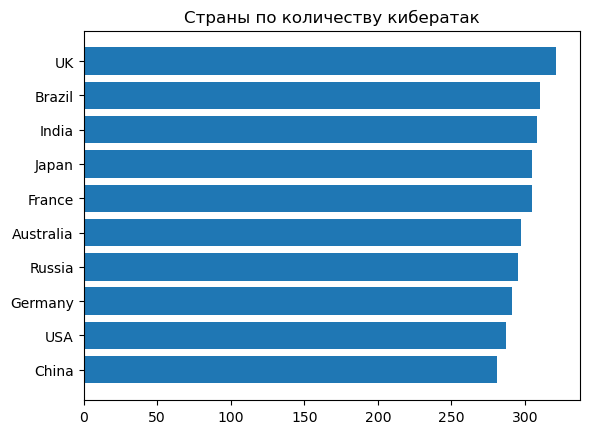

In [3]:
countries = df["Country"].value_counts(ascending=True)
plt.barh(countries.index, countries.values)
plt.title("Страны по количеству кибератак")

plt.show()
plt.close()


## 2. Какая типы защитного механизма быстрее всего решали проблему кибератаки? И как это менялось с годами?

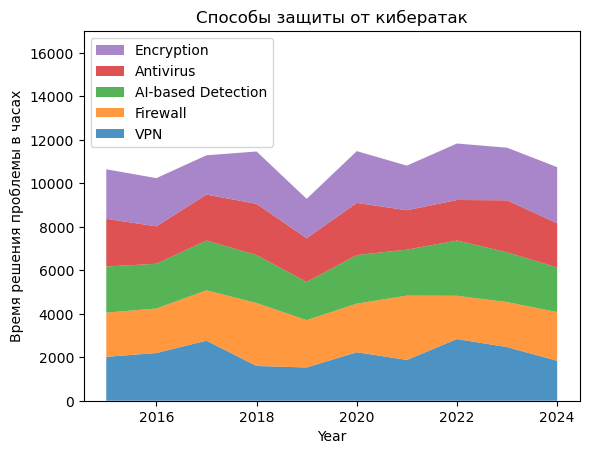

In [13]:
countries = df.groupby(["Defense Mechanism Used", "Year"])["Incident Resolution Time (in Hours)"].sum() # группируем по "Defense Mechanism Used" и "Year"
year = df["Year"].sort_values().unique()# берем года
types_1 = df["Defense Mechanism Used"].unique()# берем список названий типов защитных механизмов
values_1 = countries.values.reshape((5, 10))# делаем из списка список списков, где кол-во строк = кол-ву названий типов защитных механизмов, а кол-во столбцов = кол-ву лет


fig, ax = plt.subplots()
ax.stackplot(year, values_1,
             labels=types_1, alpha=0.8)# вводим наш график
ax.legend(loc='upper left', reverse=True)# список названий будет в вверхнем левом углу
ax.set_title('Способы защиты от кибератак')
ax.set_xlabel('Year')
ax.set_ylabel("Время решения проблемы в часах")
ax.set_ylim((0, 17000))

plt.show()
plt.close()

## 3. Какое финансовое влияние имеют кибератаки на каждую индустрию?


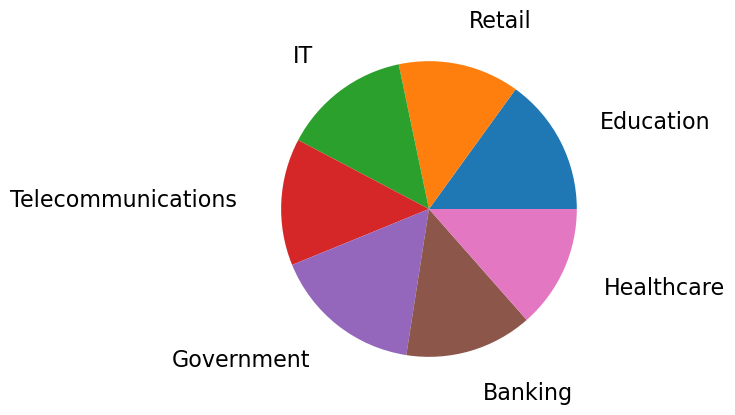

In [21]:
industries = df["Target Industry"].unique()
finance = df.groupby(["Target Industry"])["Financial Loss (in Million $)"].sum()

plt.pie(finance,
        labels = industries,
        labeldistance=1.3,
        textprops={'fontsize': 16})
plt.show()
plt.close()

In [17]:
finance

Target Industry
Banking               22772.39
Education             20071.43
Government            21205.33
Healthcare            21041.29
IT                    24809.83
Retail                21119.55
Telecommunications    20459.09
Name: Financial Loss (in Million $), dtype: float64